<a href="https://colab.research.google.com/github/sarathkumar355/prodigy-infotech-data-science-task-1/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to re-upload files


Saving API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318.csv to API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318 (1).csv
Saving API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250.csv to API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250 (1).csv


In [ ]:
import os
os.listdir()  # List available files


['.config',
 'API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318 (1).csv',
 'Metadata_Indicator_API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318.csv',
 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv',
 'API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318.csv',
 'Metadata_Country_API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318.csv',
 'Metadata_Indicator_API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250.csv',
 'API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv',
 'API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250.csv',
 'API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250 (1).csv',
 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv',
 'Metadata_Country_API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250.csv',
 'sample_data']

In [ ]:
female_file = "API_SP.POP.TOTL.FE.IN_DS2_en_CSV_v2_7318.csv"
male_file = "API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_16250.csv"

df_female = pd.read_csv(female_file, skiprows=4)
df_male = pd.read_csv(male_file, skiprows=4)


In [ ]:
# Choose the year for analysis
year = "2020"

# Keep only relevant columns and rename them
df_female = df_female[["Country Name", year]].rename(columns={year: "Female Population"})
df_male = df_male[["Country Name", year]].rename(columns={year: "Male Population"})

# Merge male and female population data
df_gender = pd.merge(df_female, df_male, on="Country Name")

# Drop rows with missing values
df_gender = df_gender.dropna()

# Calculate total population
df_gender["Total Population"] = df_gender["Male Population"] + df_gender["Female Population"]

# Show first few rows
df_gender.head()


,Country Name,Female Population,Male Population,Total Population
0,Aruba,57382.0,51205.0,108587.0
1,Africa Eastern and Southern,350869705.0,343576395.0,694446100.0
2,Afghanistan,19343529.0,19725450.0,39068979.0
3,Africa Western and Central,235687925.0,238881426.0,474569351.0
4,Angola,16911493.0,16539639.0,33451132.0


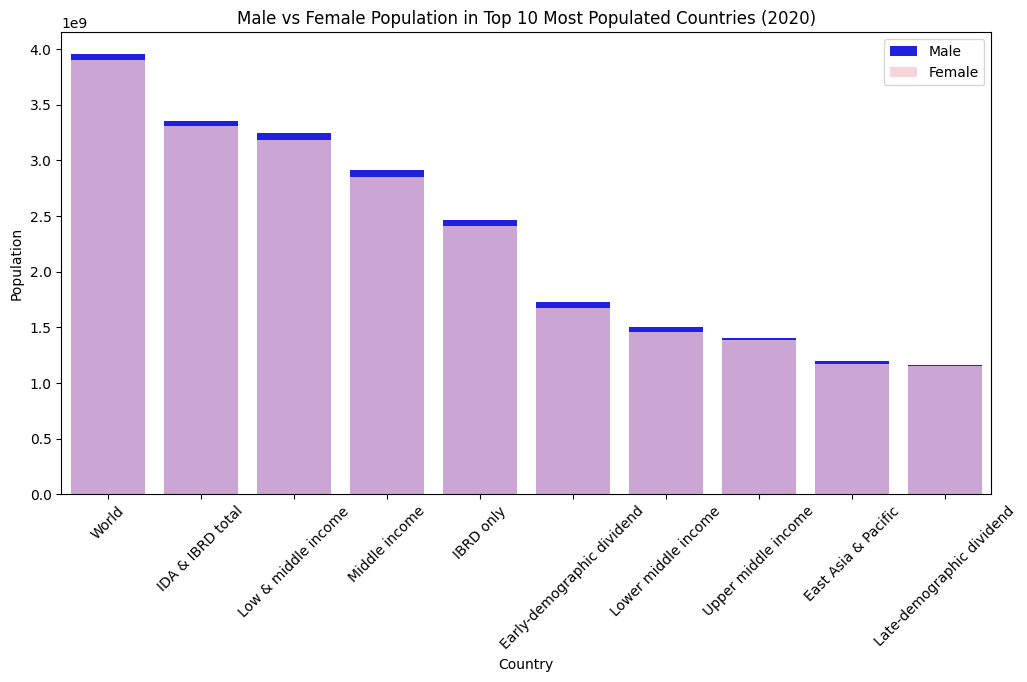

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by total population and select top 10 countries
df_top10 = df_gender.sort_values(by="Total Population", ascending=False).head(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot Male Population (bottom layer)
sns.barplot(x="Country Name", y="Male Population", data=df_top10, color="blue", label="Male")

# Plot Female Population (stacked on top)
sns.barplot(x="Country Name", y="Female Population", data=df_top10, color="pink", label="Female", alpha=0.8)

# Labels and title
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Male vs Female Population in Top 10 Most Populated Countries (2020)")
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()
